# **Stock-price prediction**

In [1]:
# Necessary imports

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')

import random
np.random.seed(123)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('Train_dataset.csv')
df_test = pd.read_csv('Test_dataset1.csv')

df_train.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987851
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [3]:
X_train = df_train.drop(columns = ['Stock Index', 'Stock Price'])
y = df_train['Stock Price']

X_test = df_test.drop(columns = ['Stock Index'])

In [4]:
# Custom function to impute the null-values

def null_value_imputation(X):
    columns = X.columns
    for i in columns:
        if X[i].dtypes == 'O':
          X[i].fillna(X[i].mode()[0], inplace = True)
        elif X[i].dtypes == 'float64':
          X[i].fillna(X[i].mean(), inplace = True)
        elif X[i].dtypes == 'int64':
          X[i].fillna(X[i].mean(), inplace = True)  
        else:
            pass
    return X

X_train = null_value_imputation(X_train)
X_test = null_value_imputation(X_test)

X = pd.concat([X_train, X_test])

In [5]:
# Function to Label Encode the categorical features

def Encoding(X):
  columns = X.columns
  for i in columns:
    if X[i].dtypes == 'O':
      le = preprocessing.LabelEncoder()
      le.fit(X[i])
      X[i] = le.transform(X[i])
    else:
      pass
  return X

X = Encoding(X)

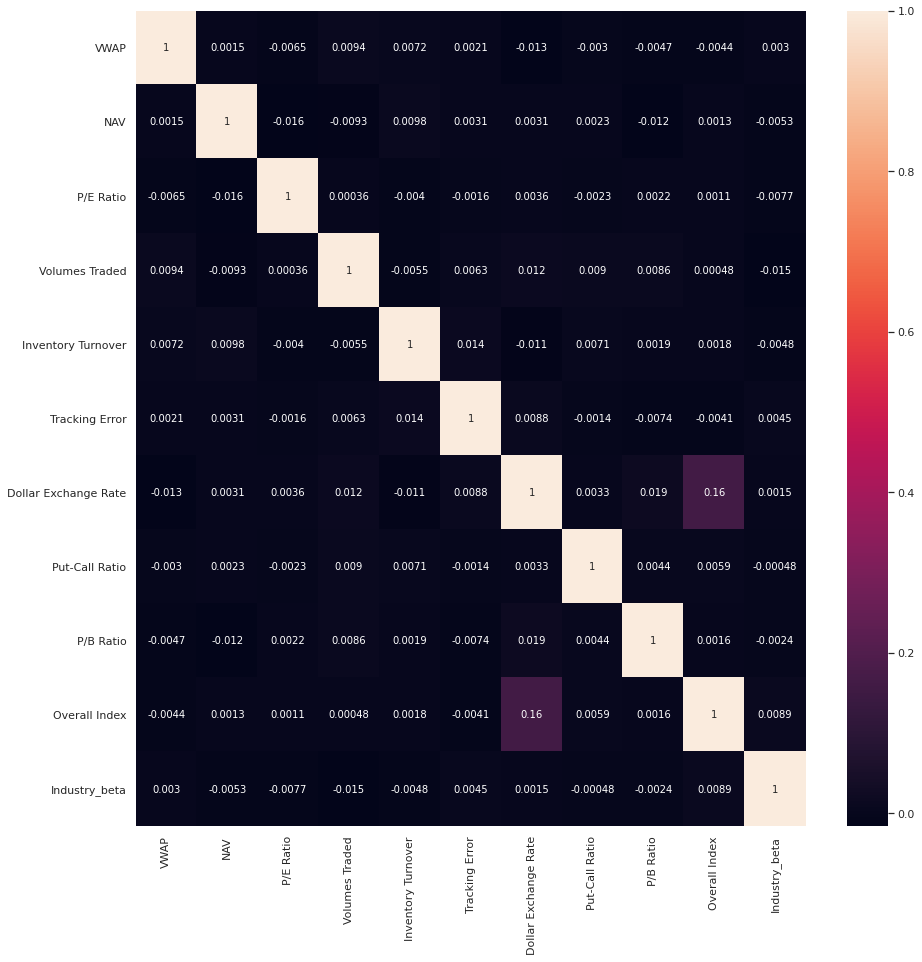

In [6]:
# Feature generation and rendundancy eradication using the correlation heatmap

X['Overall Index'] = round(X['Index'] + X['General Index'])
X = X.drop(columns = ['Index', 'General Index'])

X['Industry_beta'] = round(X['Industry'] + X['Covid Impact (Beta)'])
X = X.drop(columns = ['Industry', 'Covid Impact (Beta)'])

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), annot = True, ax = ax)

In [7]:
X_train = X[:df_train.shape[0]]
X_test = X[df_train.shape[0]:X.shape[0]]

In [8]:
X_train.head()

,VWAP,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Overall Index,Industry_beta
0,700.290000,32.38,45.350000,1208599.0,5.05,0.0520,1.0,0.610000,9.20,12769.0,4.0
1,214.520000,33.25,170.560000,13753356.0,3.10,0.0164,1.0,0.944722,6.91,12769.0,2.0
2,943.420000,88.27,143.580000,6892003.0,7.70,0.0396,1.0,0.944722,6.09,12769.0,2.0
3,828.130000,73.66,151.760000,8316793.0,4.80,0.0431,74.9,1.110000,5.60,38182.0,3.0
4,486.188167,23.79,105.543623,3943312.0,8.06,0.0244,1.0,1.070000,9.46,3355.0,4.0


In [9]:
# Validation

# X_train_val, X_test_val, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=42)
# lgbm = LGBMRegressor(n_estimators=100, num_leaves = 5)
# lgbm.fit(X_train_val, y_train)
# y_pred = lgbm.predict(X_test_val)
# r2_score(y_test, y_pred)

In [10]:
# Training and Prediction

lgbm = LGBMRegressor(n_estimators=100, num_leaves = 5)
lgbm.fit(X_train, y)
y_pred = lgbm.predict(X_test)

assert(np.sum(y_pred > 0) > 0)

In [11]:
sub = pd.DataFrame({'Stock Index': df_test['Stock Index'], 'Stock Price': y_pred})
sub.head()

,Stock Index,Stock Price
0,AC3235,808.865880
1,AC3236,268.458561
2,AC3237,1564.237672
3,AC3238,798.069467
4,AC3239,259.203764


In [12]:
# Submission

sub.to_csv('Stock Price (10-Aug).csv', index = False)